In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Complete payment dataset.csv")

df = df.drop(columns=['MARK'])

df.head()

,y,t,p,Alpha
0,1,0,5,1
1,1,0,6,1
2,1,0,7,1
3,1,0,8,1
4,1,0,3,2


In [3]:
scaler = StandardScaler()

In [4]:
df[['y_T', 'Alpha_T', 't_T', 'p_T']] = scaler.fit_transform(df[['y', 'Alpha', 't', 'p']])
df

,y,t,p,Alpha,y_T,Alpha_T,t_T,p_T
0,1,0,5,1,0.0,-1.686734,-1.240210,0.953051
1,1,0,6,1,0.0,-1.686734,-1.240210,1.568140
2,1,0,7,1,0.0,-1.686734,-1.240210,2.183230
3,1,0,8,1,0.0,-1.686734,-1.240210,2.798320
4,1,0,3,2,0.0,-0.926868,-1.240210,-0.277128
...,...,...,...,...,...,...,...,...
86,1,6,2,3,0.0,-0.167003,2.031069,-0.892218
87,1,6,2,4,0.0,0.592862,2.031069,-0.892218
88,1,6,1,5,0.0,1.352727,2.031069,-1.507307
89,1,6,2,5,0.0,1.352727,2.031069,-0.892218


In [6]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1 , max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(5, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
                

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


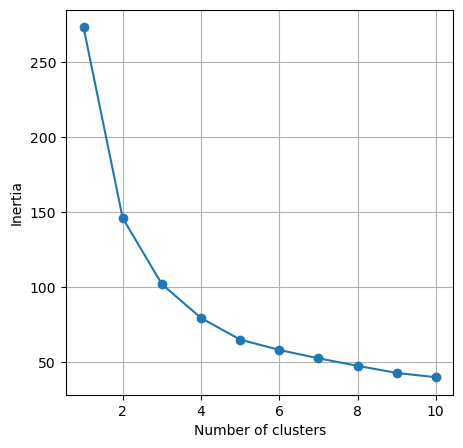

In [7]:
optimise_k_means(df[['y_T', 'Alpha_T', 't_T', 'p_T']], 11)

In [8]:
kmeans = KMeans(n_clusters = 4)

In [9]:
kmeans.fit(df[['y_T', 'Alpha_T', 't_T', 'p_T']])

KMeans(n_clusters=4)

In [10]:
df['kmeans_4'] = kmeans.labels_

In [11]:
df

,y,t,p,Alpha,y_T,Alpha_T,t_T,p_T,kmeans_4
0,1,0,5,1,0.0,-1.686734,-1.240210,0.953051,2
1,1,0,6,1,0.0,-1.686734,-1.240210,1.568140,2
2,1,0,7,1,0.0,-1.686734,-1.240210,2.183230,2
3,1,0,8,1,0.0,-1.686734,-1.240210,2.798320,2
4,1,0,3,2,0.0,-0.926868,-1.240210,-0.277128,0
...,...,...,...,...,...,...,...,...,...
86,1,6,2,3,0.0,-0.167003,2.031069,-0.892218,3
87,1,6,2,4,0.0,0.592862,2.031069,-0.892218,3
88,1,6,1,5,0.0,1.352727,2.031069,-1.507307,3
89,1,6,2,5,0.0,1.352727,2.031069,-0.892218,3


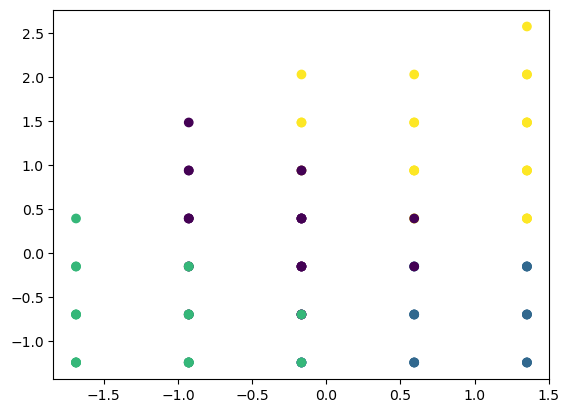

[[1.         2.64       2.52       3.56      ]
 [1.         4.23809524 0.80952381 2.47619048]
 [1.         1.61904762 0.85714286 5.76190476]
 [1.         4.33333333 4.54166667 2.16666667]]


In [12]:
plt.scatter(x=df['Alpha_T'], y=df['t_T'],  c=df['kmeans_4'])


plt.show()
inversed = scaler.inverse_transform(kmeans.cluster_centers_)
print(inversed)


In [14]:
for k in range(1 , 7):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['y_T', 'Alpha_T', 't_T', 'p_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


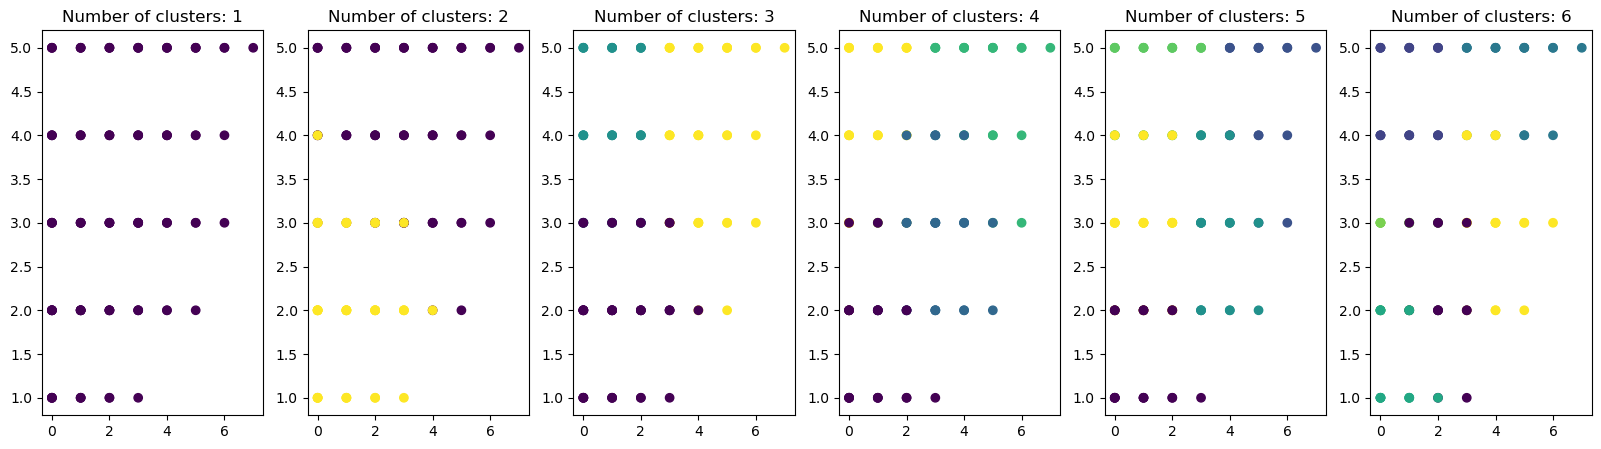

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['t'], y=df['Alpha'],   c=df[f'KMeans_{i}'])
    ax.set_title(f'Number of clusters: {i}')